In [57]:
#importing labraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [54]:
#importing dataset
ds =pd.read_csv('car data.csv')
ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [22]:
ds.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [23]:
#Data preprocessing
#Drop rows with missing values
ds=ds.dropna()

In [28]:
#numeric and categorical columns separation
numeric_col=['Year','Present_Price','Driven_kms']
categoric_col=['Fuel_Type','Selling_type','Transmission','Owner']
#new feature adding
curr_year=2025
ds['Car_age']= curr_year-ds['Year']
x=ds[numeric_col + categoric_col]
y=ds['Selling_Price']

In [32]:
#splitting data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
#preprossing
preprocess= ColumnTransformer(
    transformers=[
        ('number', StandardScaler(), numeric_col),
      ('category', OneHotEncoder(handle_unknown='ignore'),categoric_col)
    ]
)

In [37]:
#Linear Regression
lr=Pipeline(steps=[('preprocessor',preprocess),('regressor',LinearRegression())])
lr.fit(x_train, y_train)
y_pre=lr.predict(x_test)

In [42]:
#evaluating the model
MSE= mean_squared_error(y_test,y_pre)
print('MSE:',{MSE})
MAE= mean_absolute_error(y_test, y_pre)
print('MAE:',{MAE})
R2= r2_score(y_test,y_pre)
print('R2:',{R2})

MSE: {4.950083535142159}
MAE: {1.2490280548613957}
R2: {0.818645672632288}


In [48]:
#Coefficients for model
feature_names = numeric_col + list(lr.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categoric_col))
Coefficients=pd.DataFrame({'Feature':feature_names,'Coefficients':lr.named_steps['regressor'].coef_}).sort_values(by='Coefficients',ascending=False)

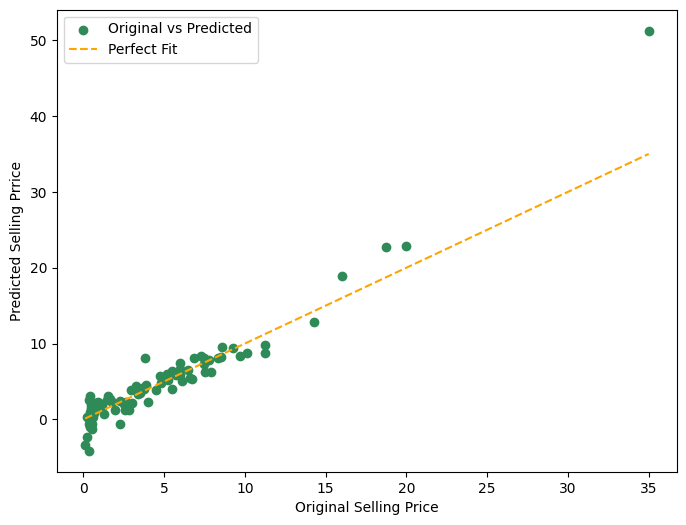

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pre, color='seagreen', label='Original vs Predicted')
plt.plot([y.min(),y.max()],[y.min(), y.max()], color='orange', linestyle='--', label='Perfect Fit')
plt.xlabel("Original Selling Price")
plt.ylabel("Predicted Selling Prrice")
plt.legend()
plt.show()
